In [1]:
import copy
import os
import sys
import time

import jax
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from helper import df_to_latex, fig_path, set_figsize, tab_path
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Import code from src
sys.path.insert(0, '../nqs/')
import nqs  # noqa

# Set plot and dataframe style
sns.set(context="paper", style='darkgrid', rc={"axes.facecolor": "0.96"})

fontsize = "large"
params = {"font.family": "serif",
          "font.sans-serif": ["Computer Modern"],
          "axes.labelsize": fontsize,
          "legend.fontsize": fontsize,
          "xtick.labelsize": fontsize,
          "ytick.labelsize": fontsize,
          "legend.handlelength": 2
          }

plt.rcParams.update(params)
plt.rc('text', usetex=True)

pd.set_option('display.max_columns', 50)

jax.config.update("jax_enable_x64", True)
jax.config.update('jax_platform_name', 'cpu')

In [2]:
df = pd.read_csv("../data/runtimes.csv")
df

,max_iter,t_rwm_numpy,t_lmh_numpy,t_rwm_jax,t_lmh_jax
0,10000,1.567534,1.851135,3.837611,6.382975
1,20000,3.155999,3.659765,7.255697,12.245864
2,30000,4.633634,5.585945,10.643678,18.218708
3,40000,6.210213,7.358634,14.068341,24.087668


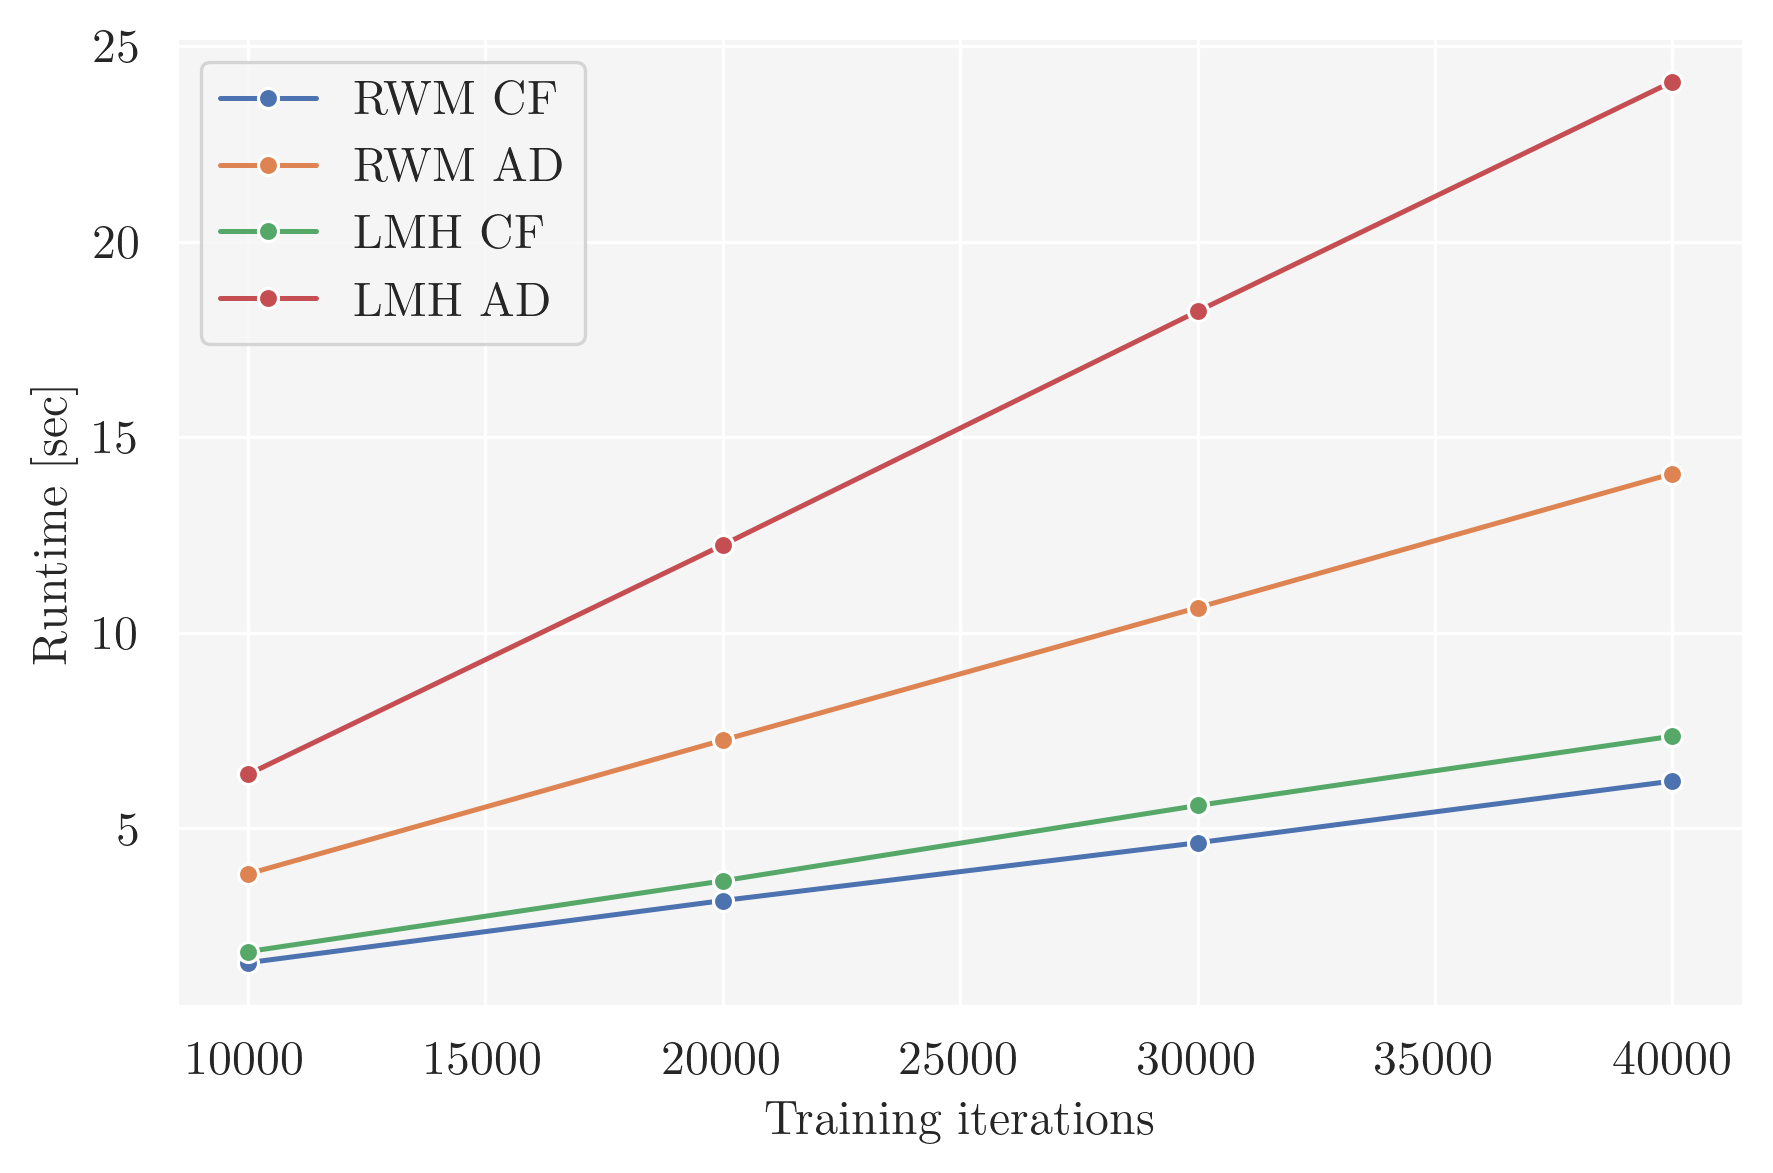

In [11]:
fig, ax = plt.subplots(nrows=1, 
                       ncols=1,
                       figsize=(6, 4), 
                       tight_layout=True,
                       dpi=150
                      )

sns.lineplot(data=df, 
             x="max_iter",  
             y="t_rwm_numpy", 
             marker="o",
             color='C0',
             label=r'RWM CF',
             ax=ax
            )

sns.lineplot(data=df, 
             x="max_iter",  
             y="t_rwm_jax", 
             marker="o",
             color='C1',
             label=r'RWM AD',
             ax=ax
            )

sns.lineplot(data=df, 
             x="max_iter",  
             y="t_lmh_numpy", 
             marker="o",
             color='C2',
             label=r'LMH CF',
             ax=ax
            )

sns.lineplot(data=df, 
             x="max_iter",  
             y="t_lmh_jax", 
             marker="o",
             color='C3',
             label=r'LMH AD',
             ax=ax
            )

ax.set(ylabel='Runtime [sec]', xlabel='Training iterations')

fig.savefig(fig_path("runtimes.pdf"), bbox_inches='tight')